<a href="https://colab.research.google.com/github/FernandoPZ/geiser/blob/main/geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos personales

## Nombre:
Fernando Péres Suárez

## Matricula:
1718110405

## Carrera:
Ingeniería en desarrollo y gestión de software

## Grupo
91

# Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Versiones

In [2]:
print("Pandas {}".format(pd.__version__))
print("Tensorflow {}".format(tf.__version__))
print("Numpy {}".format(np.__version__))
print("sklearn {}".format(sklearn.__version__))

Pandas 1.1.5
Tensorflow 2.7.0
Numpy 1.19.5
sklearn 1.0.1


# Cargar el dataset

In [3]:
df = pd.read_csv("geisers.csv")

# Información del Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [5]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# Grafica del dataframe

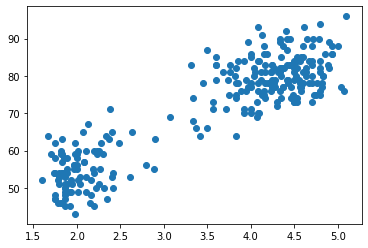

In [7]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

# Configuracion del modelo

In [8]:
model = KMeans(n_clusters=2,max_iter=100)

In [9]:
df = StandardScaler().fit_transform(df)

# Graficar valores estandarizados

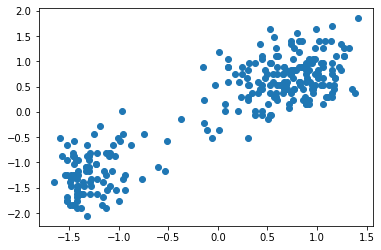

In [10]:
plt.scatter(df[:,0],df[:,1])
plt.show()

# Entrenamiento

In [11]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# Centroides

In [12]:
centroids = model.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

# Etiquetas

In [13]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

# Graficar los centroides

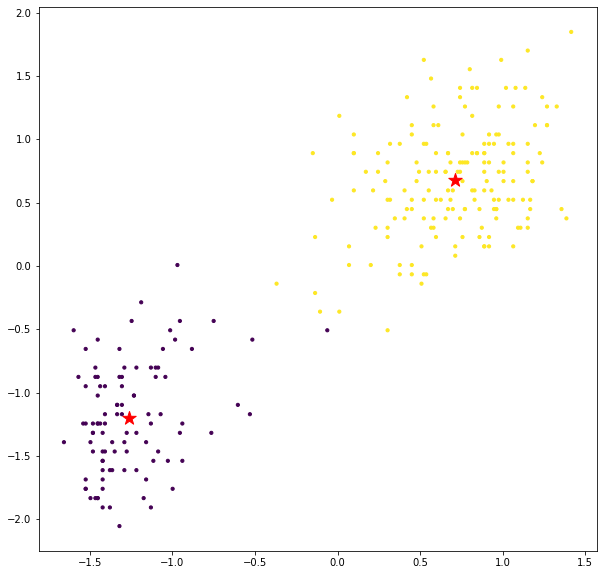

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c="red",marker='*', s=200, label="centroids")
plt.show()

# Predicciones

In [15]:
new_label = model.predict([(-1.0,0.0)])
new_label[0]

0

# Seleccionar numero de Clusters

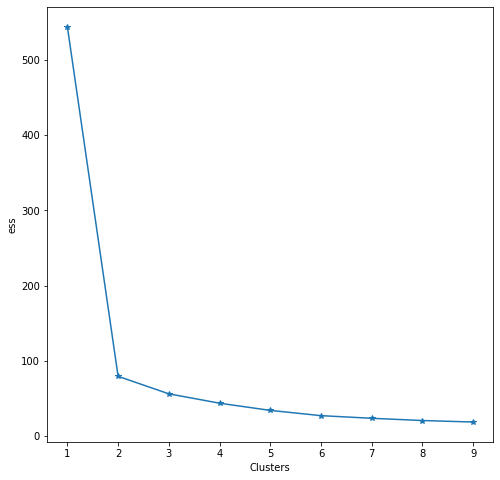

In [16]:
ess = [] 
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

# Graficar con distintos clusters

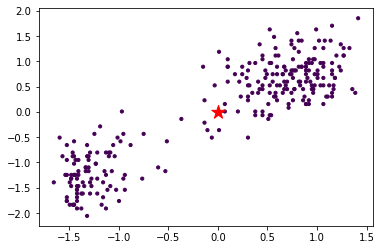

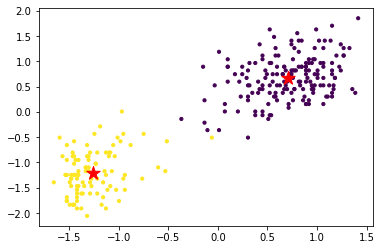

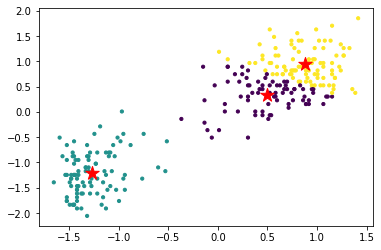

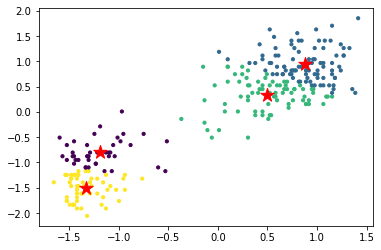

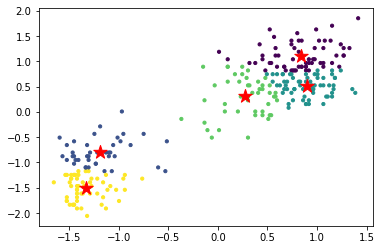

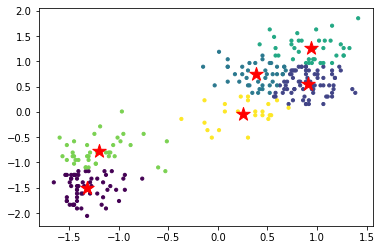

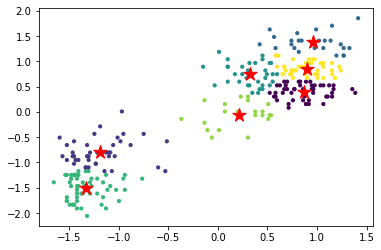

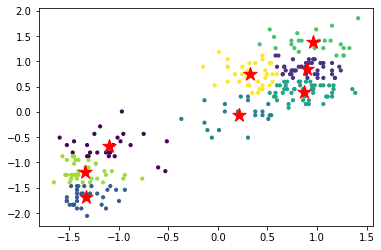

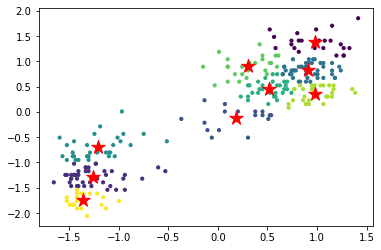

In [17]:
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()

# Conclusion

El poder manejar y administrar este tipo de informacion de esta manera nos ayuda el poder identificar de manera grafica la relacion que tienen todos los datos, separandolos en grupos donde comparten similitudes, el uso de los clusters es una manera interesante para procesar los datos.